<p style=background-color:#ff7814;font-weight:bold;font-size:16px;text-align:center;> Introduction to kNN</p>

<p style="font-family:Georgia;font-size:16px;">The K-nearest-neighbor (kNN) is one of the most important and simple methods which can be used for both classification and regression problems but is more widely preferred in classification. Although it is simplistic in nature, the KNN algorithm can have better performance levels than many other classifiers’ is usually referred to as a “lazy, non parametric” learning algorithm. A non-parametric technique usually means that it does not assume anything about the data distribution. The structure of the model is defined by the data which is very advantageous when viewed from real world perspective. For these reasons , the rudimentary kNN algorithm can be considered as a good starting point for classification problems containing little or no prior knowledge about distribution data.
One of the most important test cases of kNN can be determining similarity of documents(sometimes referred to as “Concept Search”).Though kNN is easy to use and understand it has its own downfalls.As compared to neural network or SVM , kNN performs really slowly and can sometimes be less accurate.</p>


<p style="font-family:Georgia;font-size:15.3px;">The kNN working is really simple. There is minimal training and heavy testing involved. When we need to make a prediction, the k-most similar neighbors are located and an equivalent prediction is made. It is like forming a “majority vote” between the k most similar instances to a new unobserved instance. Similarity is the distance metric between two data points. There are a number of distance measures available each with better accuracy than other depending on the given use cases and the hyperparameter selections. Usually a good starting point of distance measure in case of tabular data is the “Euclidian distance”</p>

<p style=background-color:#6aa2de;font-weight:bold;font-size:15px;text-align:center;>Exporting the necessary libraries</p>

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
from collections import Counter

<p style="font-family:Georgia;font-size:15px;">The assignment is about leveraging kNN in Python on a simple classification problem.The dataset at hand is the “Iris Flower Dataset(IFD)”  taken from UC Irvine Machine Learning Repository. The set has 3 Iris species((Iris setosa, Iris virginica and Iris versicolor) each having 50 observations. We have 4 features(attributes): 2 length(sepal_length,petal_length) and 2 width(sepal_width,petal_width)</p>

In [2]:
iris = pd.read_csv("iris.csv")

<p style=background-color:#6aa2de;font-weight:bold;font-size:15px;text-align:center;> Observing the data. Iris dataset consists of four features and one class attribute</p>

In [3]:
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.describe()


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<p style=background-color:#6aa2de;font-weight:bold;font-size:15px;text-align:center;> Analysing the data and plotting various iris classes in swarmplot.</p>


<p style=font-weight:bold;> From the plot it can be observed that iris setosa has the least length range while virginica has the longest range</p>

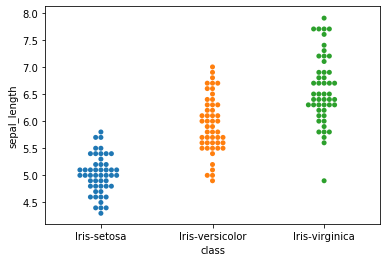

In [5]:
sns.swarmplot(x='class',y='sepal_length',data=iris)

In [6]:
iris.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
feature_columns = ['sepal_length', 'sepal_width', 'petal_length','petal_width']
X = np.array(iris[feature_columns])
y = np.array(iris['class'])
np.size(y)

150

<p>The last column of the dataset represents the class values of the corresponding data.We need to convert this into integer for prediction</p>

In [8]:
last_column= LabelEncoder()
y = last_column.fit_transform(y)
y
from sklearn.model_selection import train_test_split

<p style=font-weight:bold;>We can observe that the classes are assigned integer values respectively. Example:: Iris-Setosa becomes 0, Versicolor becomes 1 and Virginica becomes 2 </p>

In [9]:
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size = 0.35)

<p style=background-color:#6aa2de;font-weight:bold;font-size:15px;text-align:center;> Writing kNN fit from scratch </p>

<p style=font-weight:bold;> Here is where we implement the actual magic. In a nutshell , a particular row is measure against the rest of the development set and a majority vote is returned.As we have seen earlier kNN is a Lazy algorithm , it doesnt require an implementation of a train function--which is just learning the data.</p>

In [10]:
from numpy import dot
from numpy.linalg import norm

#----------EUCLIDIAN DISTANCE------------------------
def My_knn_fit(X_dev, y_dev, x_test, k,measure):
    if(measure=="euc"):
        dist_euc = []
        class_output = []

        for i in range(len(X_dev)):
            dist_euc.append([np.sqrt(np.sum(np.square(x_test - X_dev[i, :]))),i])
            
        dist_euc_sort = sorted(dist_euc)

        for i in range(k):
            class_in = dist_euc_sort[i][1]
            class_output.append(y_dev[class_in])
        majority_vote=Counter(class_output).most_common(1)[0][0]
        
        return majority_vote
    
#------------COSINE DISTANCE---------------------------    
    elif(measure=="cosine"):
        dist_cos = []
        class_output = []

        for i in range(len(X_dev)):
            cos_sim = np.sum((dot(x_test,X_dev[i, :]))/(norm(X_dev[i, :])*norm(x_test)))
            cos_dis=(1-cos_sim)
            dist_cos.append([(cos_dis),i])
            
        dist_cos_sort = sorted(dist_cos)
        
        for i in range(k):
            class_in = dist_cos_sort[i][1]
            class_output.append(y_dev[class_in])
        majority_vote=Counter(class_output).most_common(1)[0][0]   
        return majority_vote
    
#------------NORMALIZED-EUCLIDIAN DISTANCE-------------
    elif(measure=="norm_euc"):     
    #0.5*var(X-Y)/var(x)-var(y)
        dist_norm = []
        class_output = []
        for i in range(len(X_dev)):
            dist_norm.append([np.sum((np.var(X_dev[i, :]-x_test)/(np.var(X_dev[i,:]-np.var(x_test))))),i])
    
        dist_norm_sort = sorted(dist_norm)
        for i in range(k):
            class_in = dist_norm_sort[i][1]
            class_output.append(y_dev[class_in])
        majority_vote=Counter(class_output).most_common(1)[0][0]     
        return majority_vote

        

<p style=background-color:#6aa2de;font-weight:bold;font-size:15px;text-align:center;>Implementing kNN predict function </p>

In [11]:
def My_KNN_predict(X_dev, y_dev, X_test, k):

    pred_euc = []
    pred_cosine=[]
    pred_norm=[]
    for i in range(len(X_test)):
        pred_euc.append(My_knn_fit(X_dev, y_dev, X_test[i, :], k,"euc"))
        pred_cosine.append(My_knn_fit(X_dev, y_dev, X_test[i, :], k,"cosine"))
        pred_norm.append(My_knn_fit(X_dev, y_dev, X_test[i, :], k,"norm_euc"))
    pred_euc=np.array(pred_euc)
    pred_cosine=np.array(pred_cosine)
    pred_norm=np.array(pred_norm)
    #print("cos:",pred_cosine)
    #print("norm:",pred_norm)
    return (pred_euc,pred_cosine,pred_norm)

<p> Let's try out a random input taken from the csv file to see if the predcition is done correctly.The random input taken belong to setosa which corresponds to class 0 </p>

In [12]:
ran=[5.1,3.5,1.4,0.2]
predin=My_knn_fit(X_dev,y_dev,ran,5,"euc")
if(predin==0):
    print("iris-setosa")
elif(predin==1):
    print("iris-versicolor")
else:
    print("iris-virginica")


iris-setosa


In [13]:
def accuracy_scor(y_test, prediction):
    correct = 0
    n = len(y_test)
    for i in range(n):
        if(y_test[i]==prediction[i]):
            correct+=1
    accuracy_sc = (correct*100)/n
    return accuracy_sc
acc_cosine=[]
acc_euc=[]
acc_norm=[]
for k in range(1,8,2):
    pred_euc,pred_cosine,pred_norm = My_KNN_predict(X_dev, y_dev, X_test,k)
    # evaluating accuracy
    accuracy1 = accuracy_scor(y_test, pred_euc)
    acc_euc.append(accuracy1)
    accuracy2=accuracy_scor(y_test, pred_cosine)
    acc_cosine.append(accuracy2)
    accuracy3=accuracy_scor(y_test, pred_norm)
    acc_norm.append(accuracy3)
print("Euclidian accuracy:",(acc_euc))
print("Cosine accuracy:",(acc_cosine))
print("Normalised-Euclidian:",(acc_norm))

Euclidian accuracy: [98.11320754716981, 98.11320754716981, 98.11320754716981, 96.22641509433963]
Cosine accuracy: [94.33962264150944, 96.22641509433963, 98.11320754716981, 98.11320754716981]
Normalised-Euclidian: [98.11320754716981, 96.22641509433963, 98.11320754716981, 94.33962264150944]


[Text(0, 0.5, 'Accuracy(Euclidian)'), Text(0.5, 0, 'K-value')]

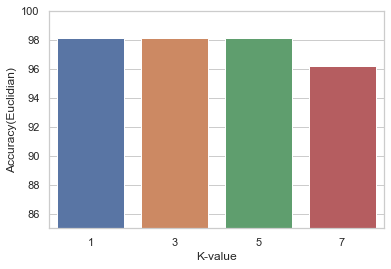

In [14]:
k=[1,3,5,7]
sns.set(style="whitegrid")
ax=sns.barplot(x=k, y=acc_euc, data=iris)
ax.set(ylim=(85, 100))
ax.set(xlabel='K-value', ylabel='Accuracy(Euclidian)')

[Text(0, 0.5, 'Accuracy(Cosine)'), Text(0.5, 0, 'K-value')]

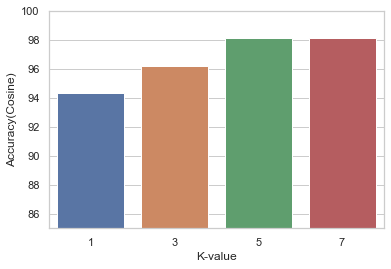

In [15]:
k=[1,3,5,7]
sns.set(style="whitegrid")
ax=sns.barplot(x=k, y=acc_cosine, data=iris)
ax.set(ylim=(85,100))
ax.set(xlabel='K-value', ylabel='Accuracy(Cosine)')

[Text(0, 0.5, 'Accuracy(Normalized Euclidian)'), Text(0.5, 0, 'K-value')]

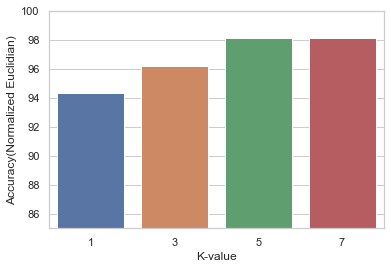

In [16]:
k=[1,3,5,7]
sns.set(style="whitegrid")
ax=sns.barplot(x=k, y=acc_cosine, data=iris)
ax.set(ylim=(85,100))
ax.set(xlabel='K-value', ylabel='Accuracy(Normalized Euclidian)')

<p style=font-weight:bold;>We see the various accuracies we get on euclidian , cosine and normalised euclidian distances with the various k values of 1,3,5,7.Let's see what happens when we run the fit and predict on hyperparameter K value from 1 to 20</p>

In [17]:
acc_cosine1=[]
acc_euc1=[]
acc_norm1=[]
for k in range(1,20,1):
    pred_euc,pred_cosine,pred_norm = My_KNN_predict(X_dev, y_dev, X_test,k)
    # evaluating accuracy
    accuracy1 = accuracy_scor(y_test, pred_euc)
    acc_euc1.append(accuracy1)
    accuracy2=accuracy_scor(y_test, pred_cosine)
    acc_cosine1.append(accuracy2)
    accuracy3=accuracy_scor(y_test, pred_norm)
    acc_norm1.append(accuracy3)
print("Euclidian accuracy:",max(acc_euc1),acc_euc1.index(max(acc_euc1))+1)
print("Cosine accuracy:",max(acc_cosine1),acc_cosine1.index(max(acc_cosine1))+1)
print("Normalised-Euclidian:",max(acc_norm1),acc_norm1.index(max(acc_norm1))+1)

Euclidian accuracy: 100.0 9
Cosine accuracy: 98.11320754716981 5
Normalised-Euclidian: 98.11320754716981 1


<p style=font-weight:bold;> We can see that considering the given parameters we get optimal values at k=5 for cosine similarity and if we iterate over values of k on 1 to 20 we get perfect scores which maybe due to perfectly labelled data or sometimes overfitting.

In [18]:
def My_KNN_predict_test(X_dev, y_dev, X_test, k):
    pred_cosine=[]
    for i in range(len(X_test)):
        pred_cosine.append(My_knn_fit(X_dev, y_dev, X_test[i, :], k,"cosine"))
    pred_cosine=np.array(pred_cosine)
    #print("cos:",pred_cosine)
    #print("norm:",pred_norm)
    return (pred_euc,pred_cosine,pred_norm)
print("Final accuracy of the optimal hyperparameter wrt to test set:",acc_cosine[2])
def My_knn_fit_test(X_dev, y_dev, x_test, k,measure):
        if(measure=="cosine"):
            dist_cos = []
            class_output = []

        for i in range(len(X_dev)):
            cos_sim = np.sum((dot(x_test,X_dev[i, :]))/(norm(X_dev[i, :])*norm(x_test)))
            cos_dis=(1-cos_sim)
            dist_cos.append([(cos_dis),i])
            
        dist_cos_sort = sorted(dist_cos)
        
        for i in range(k):
            class_in = dist_cos_sort[i][1]
            class_output.append(y_dev[class_in])
        majority_vote=Counter(class_output).most_common(1)[0][0]   
        return majority_vote
    

Final accuracy of the optimal hyperparameter wrt to test set: 98.11320754716981


<p  style="font-family:Georgia;font-size:16px;"> As we can already see , one of the most advantageous features of kNN apart from being simple and easy to understand is that requires minimal to no training time and serves as a good starting point in learning algorithms.We also saw that though "COSINE SIMILARITY WITH A HYPERPARAMTER OF 5" performed the best with an almost perfect accuracy , it took a lot of time to process as might have compared to other algorithms.Some of the improvements that can be done are using other distance metrics to measure perfomance or using dimensionality reduction techniques depending on the dataset.</p>